In [1]:
## Step 1: Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
## Step 2: Load Data

train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')


In [3]:
## Step 3: Data Exploration

print(train.head())
print(train.info())
print(train.describe())
print(train.isnull().sum())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

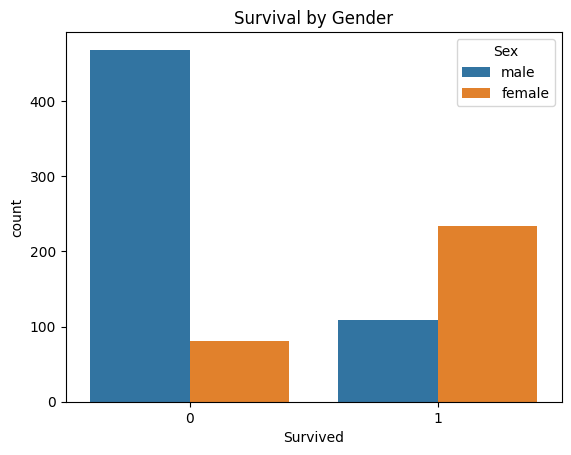

In [4]:
sns.countplot(data=train, x='Survived', hue='Sex')
plt.title('Survival by Gender')
plt.show()

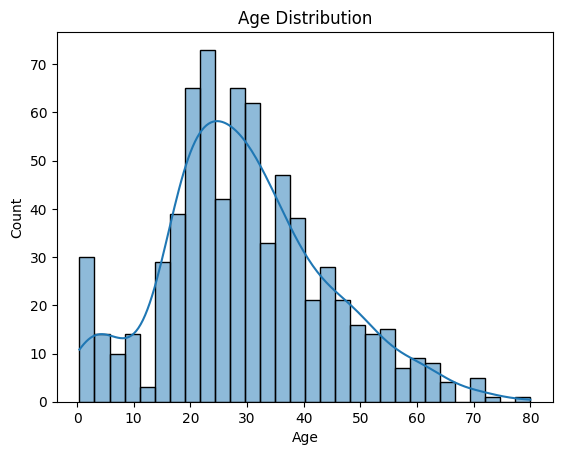

In [5]:
sns.histplot(train['Age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

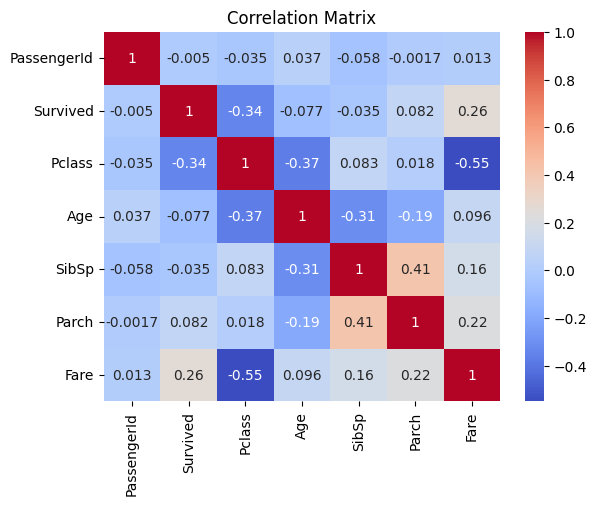

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_data = train.select_dtypes(include=['number'])

# Plot correlation heatmap
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [8]:
## Step 4: Data Cleaning

train['Age'].fillna(train['Age'].median(), inplace=True)
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)
test['Age'].fillna(test['Age'].median(), inplace=True)
test['Fare'].fillna(test['Fare'].median(), inplace=True)


C:\Users\karishma\AppData\Local\Temp\ipykernel_26180\3680973733.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Age'].fillna(train['Age'].median(), inplace=True)
C:\Users\karishma\AppData\Local\Temp\ipykernel_26180\3680973733.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

In [10]:
## Step 5: Feature Engineering

train['Set'] = 'train'
test['Set'] = 'test'
data = pd.concat([train, test], sort=False)

data['Title'] = data['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
data['Title'] = data['Title'].replace(['Mlle','Ms'], 'Miss').replace(['Mme'], 'Mrs')

data = pd.get_dummies(data, columns=['Sex', 'Embarked', 'Title'], drop_first=True)
data.drop(columns=['Cabin', 'Ticket', 'Name', 'PassengerId'], inplace=True)

train_data = data[data['Set'] == 'train'].drop(columns=['Set'])
test_data = data[data['Set'] == 'test'].drop(columns=['Set', 'Survived'])
X_train = train_data.drop('Survived', axis=1)
y_train = train_data['Survived']


In [11]:
## Step 6: Model Training & Evaluation

X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_tr, y_tr)

y_pred = model.predict(X_val)
print("Accuracy:", accuracy_score(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print("CV Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())


Accuracy: 0.8268156424581006
[[88 17]
 [14 60]]
              precision    recall  f1-score   support

         0.0       0.86      0.84      0.85       105
         1.0       0.78      0.81      0.79        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179

CV Scores: [0.79329609 0.79775281 0.84831461 0.76404494 0.81460674]
Mean CV Score: 0.803603038101814


In [12]:
## Step 7: Prediction & Submission File
final_model = RandomForestClassifier(n_estimators=100, random_state=42)
final_model.fit(X_train, y_train)
test_predictions = final_model.predict(test_data)

submission = pd.read_csv('data/test.csv')[['PassengerId']]
submission['Survived'] = test_predictions
submission.to_csv('submission.csv', index=False)
print("Saved submission.csv")


Saved submission.csv
